In [10]:
#Grid Setup

import numpy as np
import matplotlib.pyplot as plt

# Grid parameters

Lx, Ly = 2.0, 1.0                        # domain size
nx, ny = 100, 100                        # number of grid points
dx, dy = Lx / (nx - 1), Ly / (ny - 1)

x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)


In [11]:
#Initialize Fields to Zero (fluid at rest)

# Streamfunction (psi), Vorticity (omega), Velocities (u, v)

psi = np.zeros_like(X)
omega = np.zeros_like(X)
u = np.zeros_like(X)
v = np.zeros_like(X)



In [12]:
# Defining the cylinder

# Cylinder parameters

cx, cy = 0.5, 0.5         # center of cylinder
radius = 0.1

# Creating a mask where the cylinder exists

cylinder = (X - cx)**2 + (Y - cy)**2 < radius**2

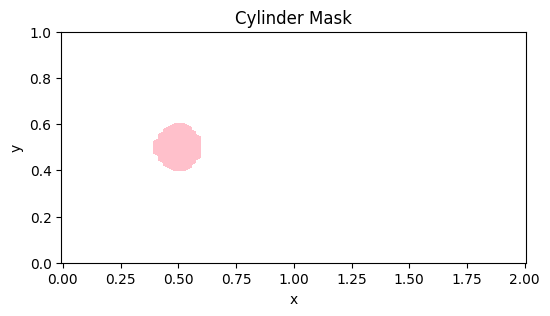

In [13]:
# Visualizing the cylinder Mask
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 3))
plt.contourf(X, Y, cylinder, levels=[0.5, 1], colors='pink')
plt.title('Cylinder Mask')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.savefig("cylinder_mask.png", dpi=300, bbox_inches='tight')
plt.show()

In [14]:
# Setting uniform inflow 

u[:, :] = 1.0     # Horizontal flow everywhere
v[:, :] = 0.0     # No vertical flow

# Enforcing no-slip on the cylinder

u[cylinder] = 0.0
v[cylinder] = 0.0

# Mask streamfunction & vorticity

psi[cylinder] = 0.0
omega[cylinder] = 0.0

In [15]:
# Defining boundary conditions

# Inlet (left edge)

u[:, 0] = 1.0
v[:, 0] = 0.0

# Outlet (right edge)

u[:, -1] = u[:, -2]
v[:, -1] = v[:, -2]

# Top & bottom walls

u[0, :] = u[1, :]
u[-1, :] = u[-2, :]
v[0, :] = 0.0
v[-1, :] = 0.0

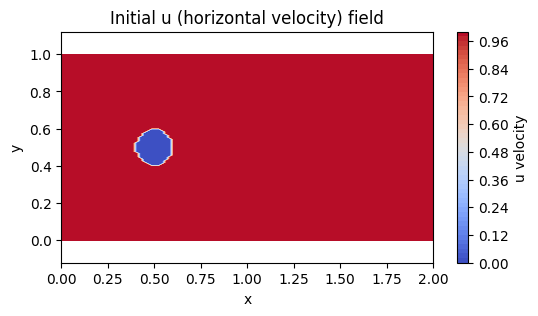

In [16]:
# Visualizing Initial u Field

plt.figure(figsize=(6, 3))
plt.contourf(X, Y, u, levels=50, cmap='coolwarm')
plt.colorbar(label='u velocity')
plt.title('Initial u (horizontal velocity) field')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.savefig("initial_u_field.png", dpi=300, bbox_inches='tight')
plt.show()

